# Sales Prediction for Bigmart Outlet

##### About Data:
* collected from 2013

* files:train, test and submission

* train: 8523 records and 12 columns
* test: 5681 records and 11 columns

       

# Understand more about the data

Variable	Description
   * Independent variables(11)
* Item_Identifier	Unique product ID
* Item_Weight	Weight of product
* Item_Fat_Content	Whether the product is low fat or not
* Item_Visibility	The % of total display area of all products in a store allocated to the particular product
* Item_Type	The category to which the product belongs
* Item_MRP	Maximum Retail Price (list price) of the product
* Outlet_Identifier	Unique store ID
* Outlet_Establishment_Year	The year in which store was established
* Outlet_Size	The size of the store in terms of ground area covered
* Outlet_Location_Type	The type of city in which the store is located
* Outlet_Type	Whether the outlet is just a grocery store or some sort of supermarket
 * Target variable(1)
* Item_Outlet_Sales	Sales of the product in the particular store. This is the outcome variable to be predicted.

###### Business Goal :
Using this model, BigMart will try to predict product sales

###### Analysis:
* Type of problem: Supervised Learning problem
* Target feature : Item_Outlet_Sales
* Evaluation Metrics: Root Mean Square Error 

#### Load the necessary libararies

In [48]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [62]:
train = pd.read_csv('train_v9rqX0R.csv')

In [63]:
# taking backup of the original data
train_bkup = train.copy()

#### Find details from the data

In [5]:
train.shape

(8523, 12)

In [8]:
test = pd.read_csv('test_AbJTz2l.csv')

In [9]:
test.shape

(5681, 11)

In [10]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [12]:
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [13]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Basic intuition on the data

based outlet
-------------
* size = yes
* presence_age = yes
* location = yes
* brand = no
* advertisement = no
* type
* competitor = no

based product
------------
* price = yes
* discount = no
* quality = no
* qunatity = yes
* advertisement = yes


In [14]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Descriptive analytics

In [18]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
train.duplicated().sum()

0

In [21]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [22]:
train['Item_Fat_Content'].nunique()

5

In [24]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [23]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [25]:
columns_with_less_unique = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [27]:
for col in columns_with_less_unique:
    print(col, '=', train[col].nunique(), train[col].unique())

Item_Fat_Content = 5 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type = 16 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier = 10 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Establishment_Year = 9 [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Outlet_Size = 3 ['Medium' nan 'High' 'Small']
Outlet_Location_Type = 3 ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type = 4 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


# Observations:
    
Item_Fat_Content contains repeated info with different names (replace)
Low Fat
Regular


Item_Type (16 varities)
1. Drinks
2. Foods
3. Others

total outlets = 10
Outlet Types = 4
Outlet Location = 3
outlet Size  = 3


In [28]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###### Additional Observations
Columns that contains Null 
* Item_Weight 
* Outlet_Size

In [29]:
# choice to fill null using mean of whole item_weight
train['Item_Weight'].mean()

12.857645184135976

In [30]:
train[train['Item_Weight'].isna()].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680


In [32]:
train[train['Item_Identifier']=='FDP10']['Item_Weight']

7        NaN
585     19.0
2623    19.0
3382    19.0
4585    19.0
6087    19.0
7883    19.0
Name: Item_Weight, dtype: float64

In [33]:
train[train['Item_Identifier']=='FDP10']['Item_Weight'].mean()

19.0

In [35]:
train[train['Item_Identifier']=='DRI11']['Item_Weight']

18       NaN
1366     NaN
3127    8.26
5310    8.26
7022    8.26
7192    8.26
8483    8.26
Name: Item_Weight, dtype: float64

In [34]:
train[train['Item_Identifier']=='DRI11']['Item_Weight'].mean()

8.26

In [36]:
train.groupby('Item_Identifier').Item_Weight.mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [37]:
train['Item_Weight_new1'] = train.Item_Weight.mean()

In [38]:
# choice to fill null using mean of item_weight based on Item_Identifier

train['Item_Weight_new2'] = train.groupby('Item_Identifier').Item_Weight.transform(lambda x:x.fillna(x.mean()))

In [40]:
train[['Item_Identifier','Item_Weight','Item_Weight_new1','Item_Weight_new2']].head(2)

,Item_Identifier,Item_Weight,Item_Weight_new1,Item_Weight_new2
0,FDA15,9.30,12.857645,9.30
1,DRC01,5.92,12.857645,5.92


In [41]:
train[train['Item_Weight'].isna()].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_new1,Item_Weight_new2
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,12.857645,19.00
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,12.857645,8.26


# EDA
# Univariate Analysis


In [42]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_new1',
       'Item_Weight_new2'],
      dtype='object')

* Target Variable
* Since our target variable is continuous, we can visualise it by plotting its histogram.

In [43]:
train.Item_Outlet_Sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


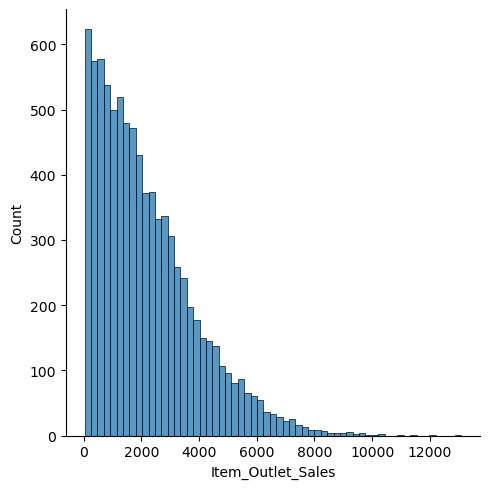

In [46]:
sns.displot(train['Item_Outlet_Sales'])

<Axes: >

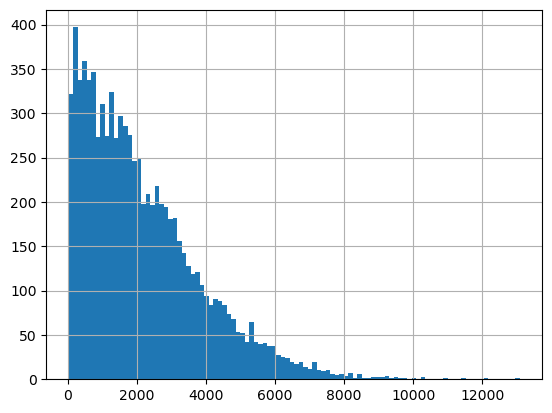

In [52]:
train['Item_Outlet_Sales'].hist(bins=100)

<Axes: >

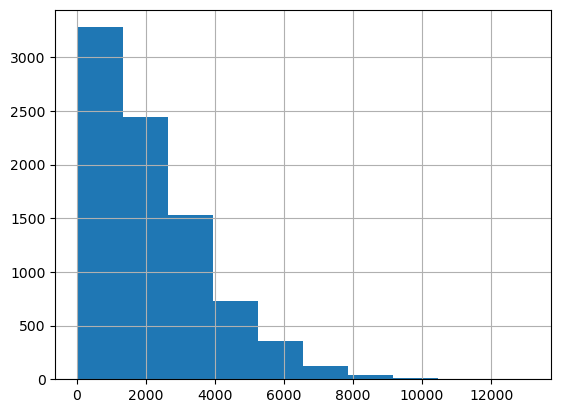

In [51]:
train['Item_Outlet_Sales'].hist()

###### Observations:
* sales are high within 2000 
* sales are very above 8000

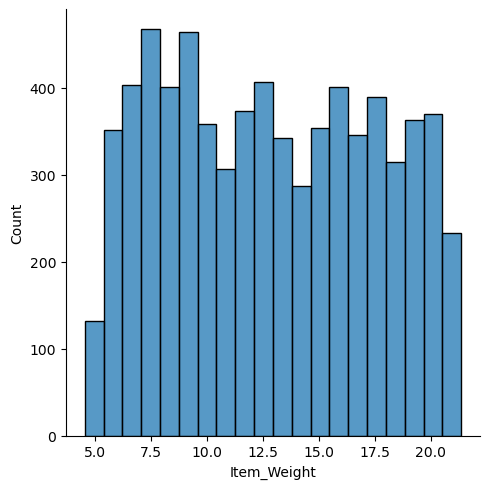

In [49]:
sns.displot(train['Item_Weight'])

###### Observations:
* range is 5 to 20kgs


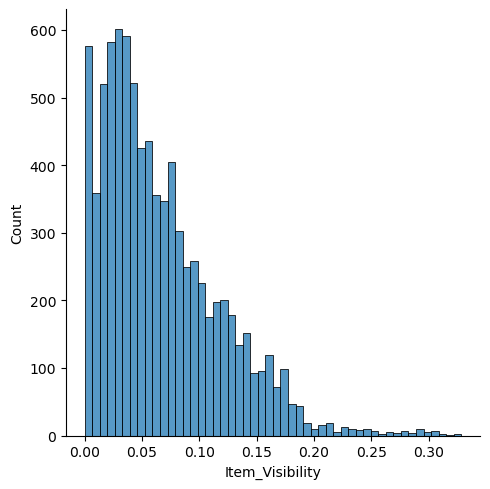

In [53]:
sns.displot(train['Item_Visibility'])

###### Observations:
* lots of item are not showcased enough

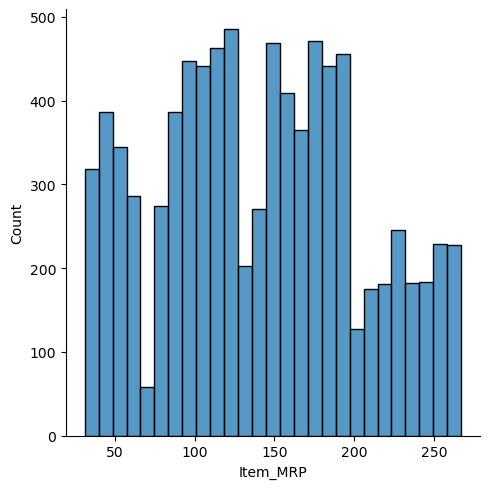

In [54]:
sns.displot(train['Item_MRP'])

###### Observations:
* price with range 100-200 there are more sales

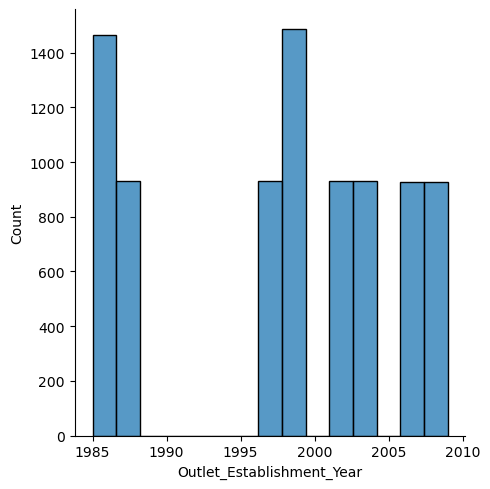

In [56]:
sns.displot(train['Outlet_Establishment_Year'])

###### Observations
* there are no outlets opened during the 1990-1995

In [58]:
train['Outlet_Establishment_Year'].value_counts().sort_index()

Outlet_Establishment_Year
1985    1463
1987     932
1997     930
1998     555
1999     930
2002     929
2004     930
2007     926
2009     928
Name: count, dtype: int64

In [ ]:
# there are no outlets opened during the 1988-1996

In [59]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_new1',
       'Item_Weight_new2'],
      dtype='object')

In [60]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Weight_new1',
       'Item_Weight_new2'],
      dtype='object')

In [65]:
numerical_columns = train.select_dtypes(include=np.number).columns

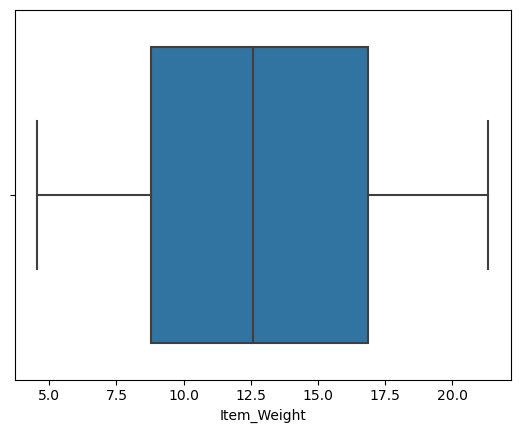

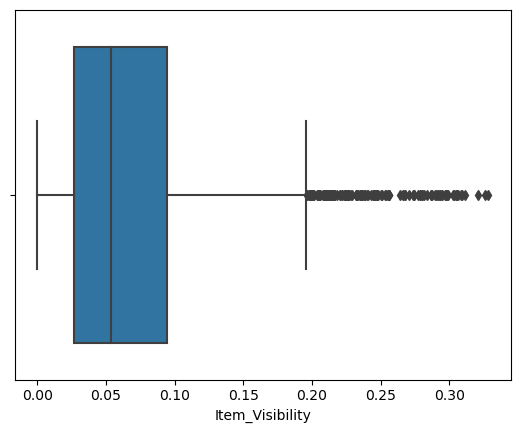

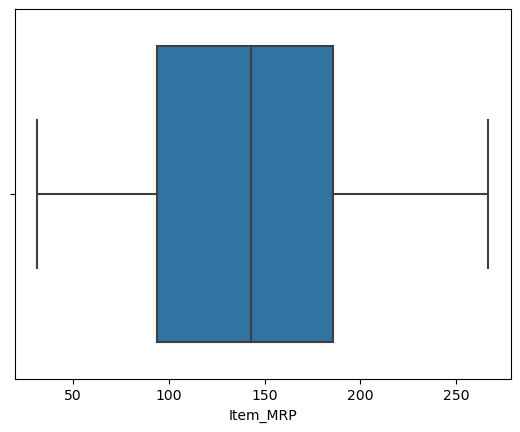

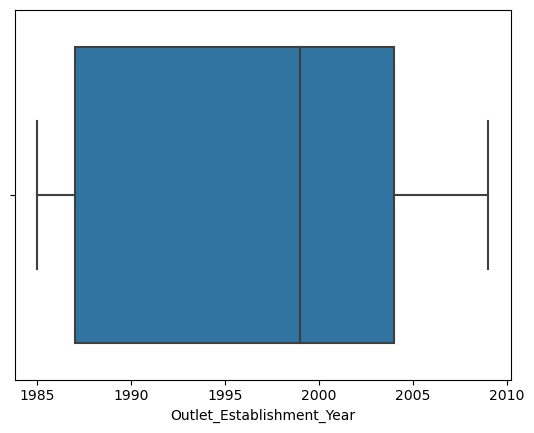

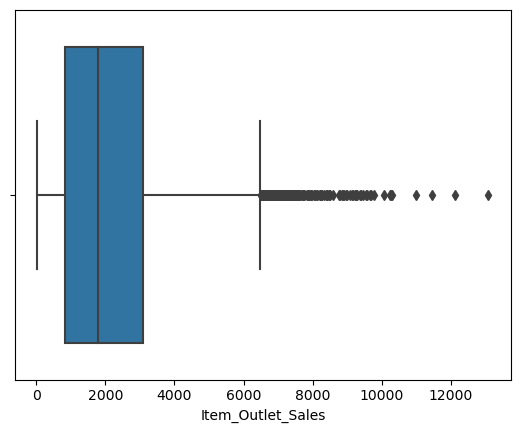

In [66]:
for col in numerical_columns:
    sns.boxplot(data=train, x=col)
    plt.show()

In [ ]:
# train = pd.read_csv('train_v9rqX0R.csv')

In [71]:
numerical_columns = train.select_dtypes(include=np.number).drop(columns=['Item_Outlet_Sales']).columns

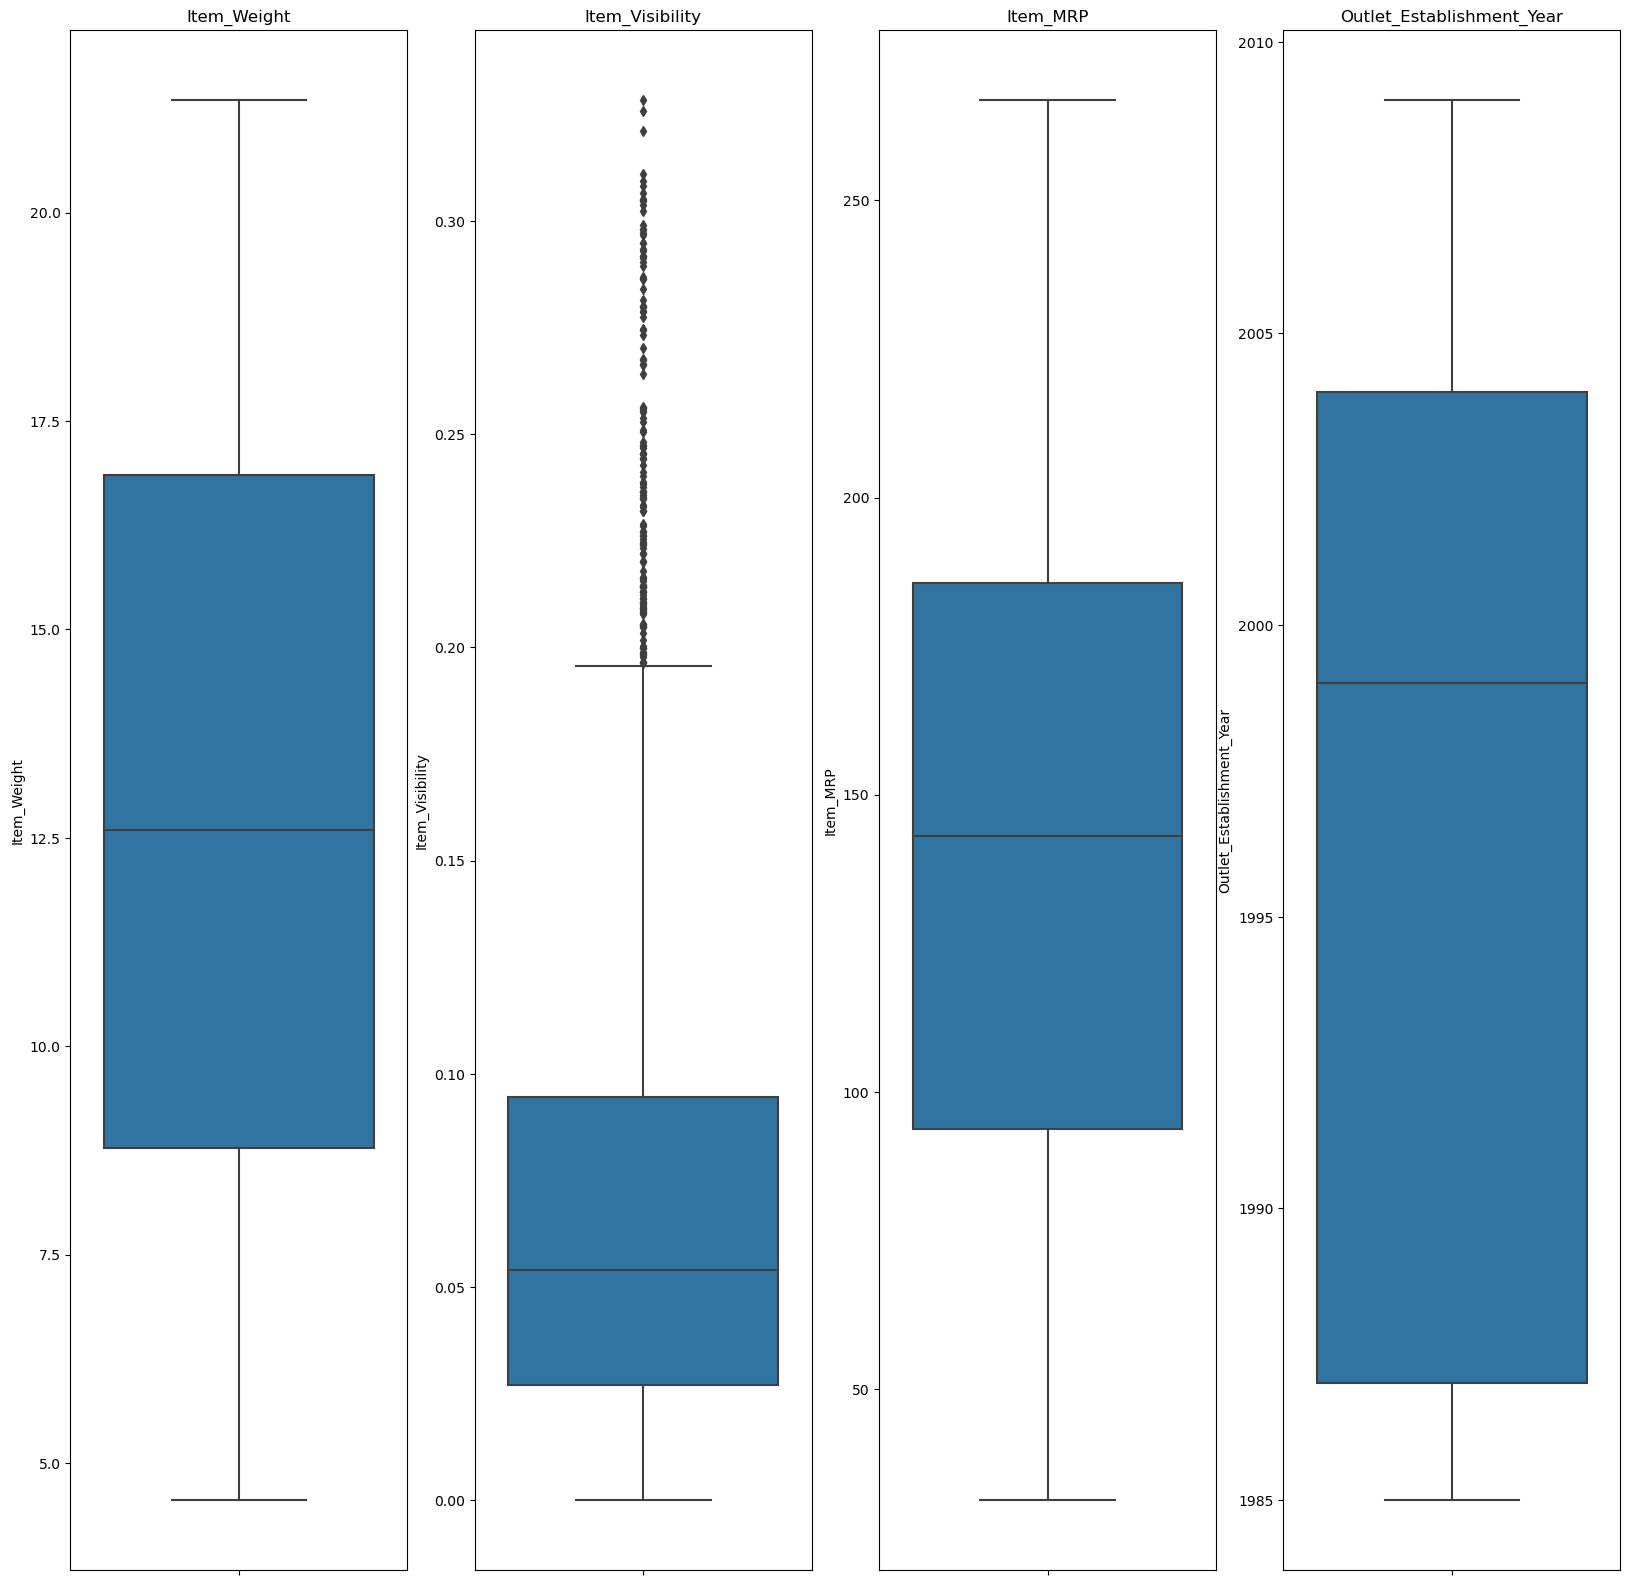

In [76]:
fig, ax = plt.subplots(nrows=1,ncols=4, figsize=(20,20))

for i, col in enumerate(numerical_columns):
    sns.boxplot(data=train, y=col, ax=ax[i])
    ax[i].set_title(col)
plt.show()

###### Observations:

* There are almost no outliers in the Item_Weight, Item_MRP and Outlet_Establishment_Year features.
* Conversely there are some outliers to be removed in the Item_Visibility


In [78]:
category_columns = train.select_dtypes(exclude=np.number).columns

In [79]:
category_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

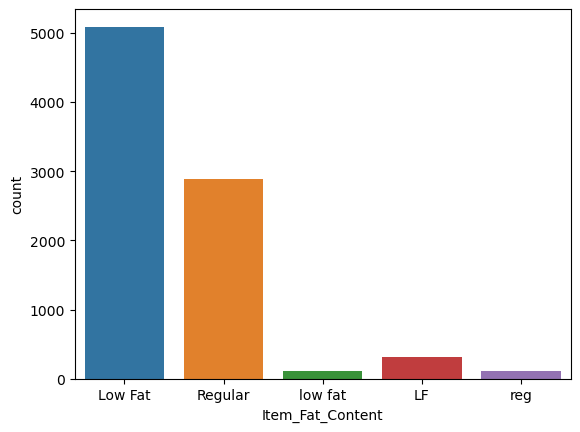

In [80]:
sns.countplot(data=train, x='Item_Fat_Content')

<Axes: xlabel='Item_Type', ylabel='count'>

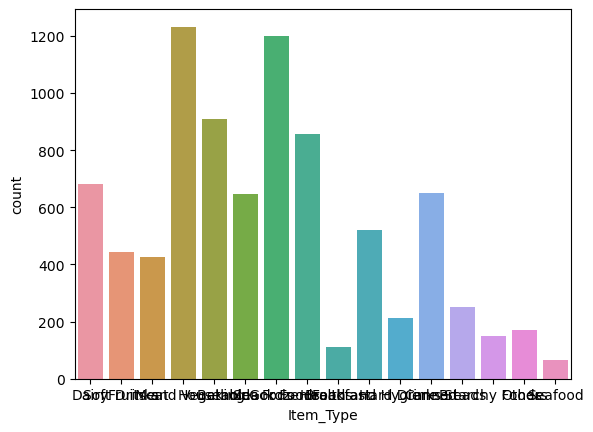

In [82]:
sns.countplot(data=train, x='Item_Type')

<Axes: xlabel='count', ylabel='Item_Type'>

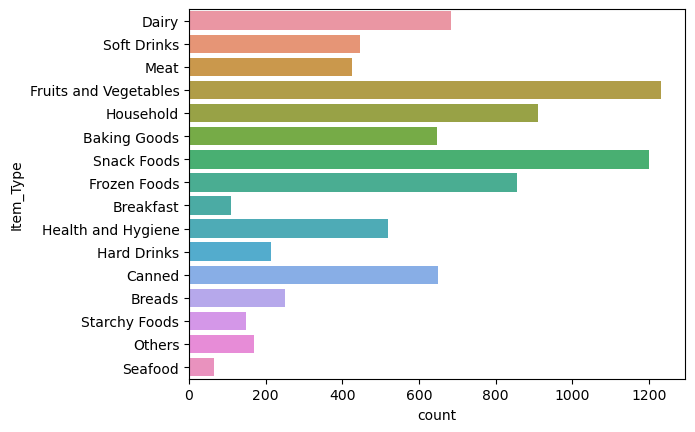

In [81]:
sns.countplot(data=train, y='Item_Type')

<Axes: ylabel='count'>

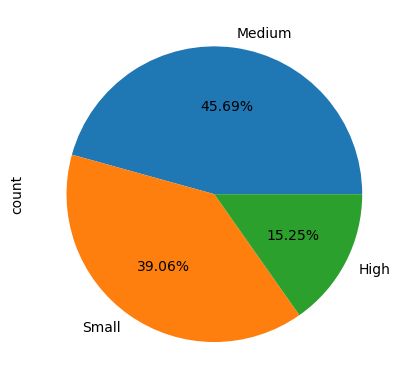

In [90]:
train['Outlet_Size'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [87]:
train['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

###### Categorical columns
###### Observations:

* The Item_Fat_Content column must be cleaned because there are some entry errors:

'Low Fat', 'low fat' and 'LF' should be the same category
Similarly 'Regular' and 'reg' should the same Another remarq in this column is that 'Low Fat' item category is greater than 'Regular' one.

* There are 16 different categories in the the Item_type feature. I think it's a lot. May be in the feature engineering section we can try to group them into categories. For example grouping:

'Soft Drinks' and 'Hard Drinks' into a 'Drinks' category or
'Snack Foods', 'Frozen Foods', 'Snarchy Foods' and 'Seafood' into a 'Foods' category.


In [ ]:
# to display the values instead of %
#train['Outlet_Size'].value_counts().plot(kind='pie', autopct='%.2f%%')

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

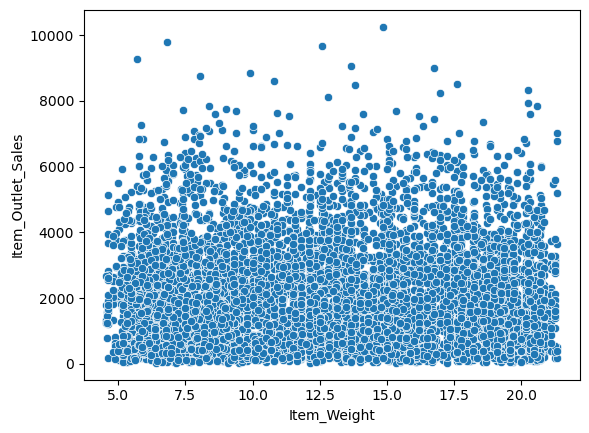

In [91]:
sns.scatterplot(data=train, x='Item_Weight' , y='Item_Outlet_Sales')

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

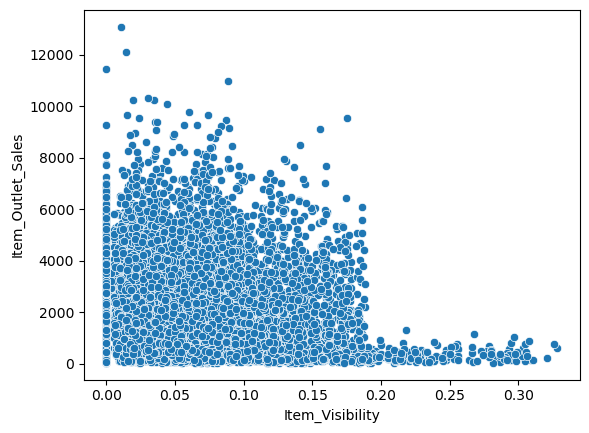

In [92]:
sns.scatterplot(data=train, x='Item_Visibility' , y='Item_Outlet_Sales')

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

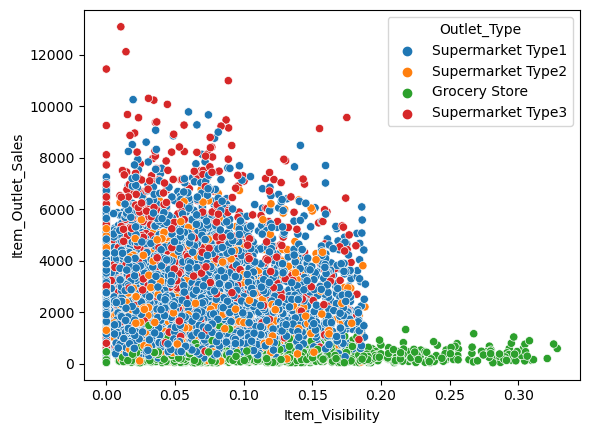

In [95]:
sns.scatterplot(data=train, x='Item_Visibility' , y='Item_Outlet_Sales', hue='Outlet_Type')

In [93]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<Axes: >

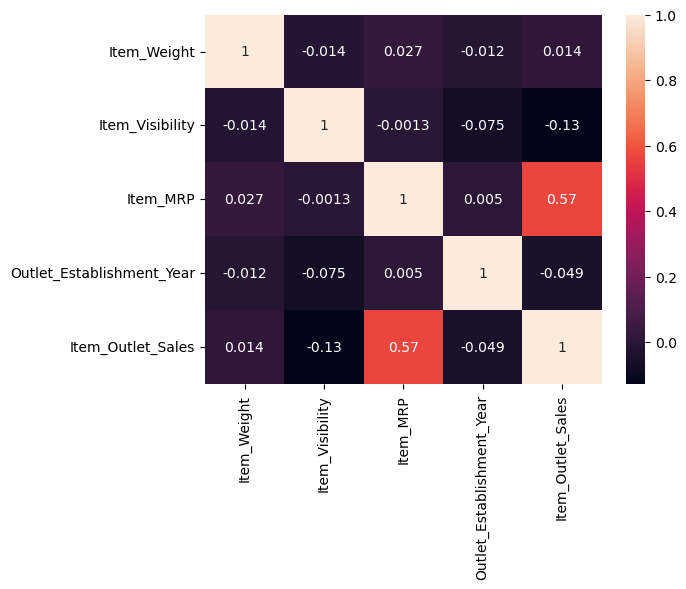

In [100]:
sns.heatmap(pd.concat([train[numerical_columns],train['Item_Outlet_Sales']], axis=1).corr(), annot=True)

In [101]:
train['age_of_outlet'] = 2024 - train['Outlet_Establishment_Year']

In [102]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,age_of_outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15


In [103]:
!python --version

Python 3.11.5


###### Steps to preprocess with this data
* missing value treatment
* no duplication(ignore)
* encoding category variables
* standarizing the feature scale

# Base Line Model

In [104]:
train = pd.read_csv('train_v9rqX0R.csv')

In [107]:
submisssion = pd.read_csv('sample_submission_8RXa3c6.csv')

In [108]:
submisssion.columns

Index(['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'], dtype='object')

In [105]:
# Mean taken from historical data
mean_sales = train['Item_Outlet_Sales'].mean()

In [109]:
#define a dataframe for submission
base_model = test[['Item_Identifier', 'Outlet_Identifier']]
base_model['Item_Outlet_Sales'] = mean_sales

In [110]:
base_model

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914
...,...,...,...
5676,FDB58,OUT046,2181.288914
5677,FDD47,OUT018,2181.288914
5678,NCO17,OUT045,2181.288914
5679,FDJ26,OUT017,2181.288914


In [111]:
base_model.to_csv('submission_by_base_modelling.csv', index=False)

#### Results
* After uploading the baseline model

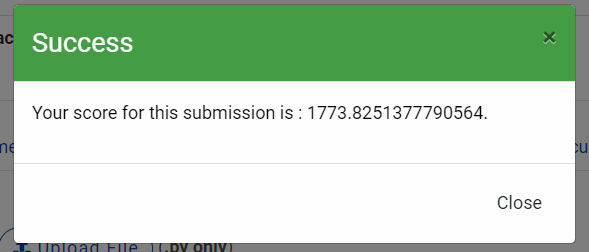

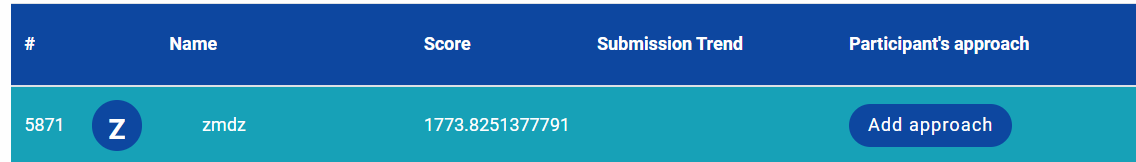

In [112]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [113]:
train['Item_Weight'].mean()

12.857645184135976

In [115]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace=True)

In [116]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [117]:
train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [121]:
train['Outlet_Size'].mode().values[0]

'Medium'

In [123]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode().values[0], inplace=True)

In [124]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [125]:
train.duplicated().sum()

0

In [126]:
cat_cols = train.select_dtypes(include='object').drop(columns='Item_Identifier').columns
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [127]:
num_cols = train.select_dtypes(exclude='object').drop(columns='Item_Outlet_Sales').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [128]:
train[cat_cols].head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2


In [129]:
train[num_cols].head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009


In [130]:
# convert category into columns
preprocess_category_train_columns = pd.get_dummies(train[cat_cols], dtype=int)
preprocess_category_train_columns.head(2)

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [132]:
preprocess_category_train_columns.columns

Index(['Item_Fat_Content_LF', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Fat_Content_low fat',
       'Item_Fat_Content_reg', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
     

In [131]:
train[cat_cols].nunique()

Item_Fat_Content         5
Item_Type               16
Outlet_Identifier       10
Outlet_Size              3
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [133]:
train[num_cols].head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,1999
1,5.92,0.019278,48.2692,2009


In [134]:
from sklearn.preprocessing import StandardScaler

In [135]:
scaler = StandardScaler()

In [137]:
preprocess_numeric_train_columns = pd.DataFrame(scaler.fit_transform(train[num_cols]), columns = num_cols)
preprocess_numeric_train_columns.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,-0.841872,-0.970732,1.747454,0.139541
1,-1.641706,-0.908111,-1.489023,1.334103


In [139]:
train_preprocessed = pd.concat([preprocess_category_train_columns, preprocess_numeric_train_columns, train['Item_Outlet_Sales']], axis=1)
train_preprocessed.head(2)

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-0.841872,-0.970732,1.747454,0.139541,3735.1380
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,-1.641706,-0.908111,-1.489023,1.334103,443.4228


In [140]:
X = train_preprocessed.drop(columns=['Item_Outlet_Sales'])
y = train_preprocessed[['Item_Outlet_Sales']]

In [141]:
X.head(2)

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,-0.841872,-0.970732,1.747454,0.139541
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,-1.641706,-0.908111,-1.489023,1.334103


In [142]:
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [144]:
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.2, random_state=42)
train.shape, train_X.shape, train_y.shape, val_X.shape, val_y.shape

((8523, 12), (6818, 45), (6818, 1), (1705, 45), (1705, 1))

In [153]:
train_X.head(2)

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
549,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,-0.794544,-0.599405,0.487415,0.139541
7757,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1.216873,-0.361643,0.474526,0.497909


In [155]:
train_y.head(2)

,Item_Outlet_Sales
549,2386.2272
7757,3103.9596


In [156]:
val_X.head(2)

,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
7503,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.341315,-0.772020,-0.988617,-1.293934
2957,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,-1.166065,0.096983,-1.578319,-0.099372


In [157]:
val_y.head(2)

,Item_Outlet_Sales
7503,1743.0644
2957,356.8688


In [146]:
model = LinearRegression()

In [147]:
# fitting rhe train data
model.fit(train_X,train_y)

LinearRegression()

In [149]:
from sklearn.metrics import mean_squared_error

In [158]:
# validating with Train data(known data for the model)
pred_train_y = model.predict(train_X)
print('Train RMSE:',mean_squared_error(train_y,pred_train_y, squared=False))

Train RMSE: 1141.391927100745


In [151]:
# validating with validation data(UNknown data for the model)
pred_val_y = model.predict(val_X)
print('Validation RMSE:',mean_squared_error(val_y,pred_val_y, squared=False))

Validation RMSE: 1069.5231918016423


In [152]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

# '-#################################

In [ ]:
# using pipeline to fit and predict

In [159]:
train = pd.read_csv('train_v9rqX0R.csv')

In [160]:
category_columns_to_encode = train.select_dtypes(include='object').drop(columns='Item_Identifier').columns
category_columns_to_encode


Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [166]:

num_cols = train.select_dtypes(exclude='object').drop(columns='Item_Outlet_Sales').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [197]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectKBest, f_regression

In [165]:
cat_pipe_encode = Pipeline(
steps = [
    ('impute_cat', SimpleImputer(strategy='most_frequent')),# mode
    ('ohe',OneHotEncoder())
])

In [168]:
num_pipe_encode = Pipeline(
steps = [
    ('impute_num', SimpleImputer(strategy='mean')),
    ('scale',StandardScaler())
])

In [171]:
preprocess = ColumnTransformer(
transformers=[
    ('num_encode', num_pipe_encode, num_cols),
    ('cat_encode', cat_pipe_encode, category_columns_to_encode)
])

In [172]:
model_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocess),
        #('feat_select',SelectKBest(f_regression,k=6))
        ('lin_reg', LinearRegression())
    ])

In [200]:
X = train.drop(columns=['Item_Outlet_Sales'])
y = train[['Item_Outlet_Sales']]

In [174]:
X.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2


In [175]:
y.head(2)

,Item_Outlet_Sales
0,3735.1380
1,443.4228


In [176]:
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.2, random_state=42)
train.shape, train_X.shape, train_y.shape, val_X.shape, val_y.shape

((8523, 12), (6818, 11), (6818, 1), (1705, 11), (1705, 1))

In [177]:
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('cat_encode',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object'))])),
                ('lin_reg', LinearRegression())])

In [178]:
# validating with Train data(known data for the model)
pred_train_y = model_pipeline.predict(train_X)
print('Train RMSE using pipeline:',mean_squared_error(train_y,pred_train_y, squared=False))

Train RMSE using pipeline: 1141.392208675015


In [180]:
# validating with Train data(unknown data for the model)
pred_val_y = model_pipeline.predict(val_X)
print('Validation RMSE using pipeline:',mean_squared_error(val_y,pred_val_y, squared=False))

Validation RMSE using pipeline: 1069.515718226307


In [191]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [181]:
y_sub = model_pipeline.predict(test)

In [182]:
submisssion.head(2)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000


In [ ]:
submisssion['Item_Outlet_Sales'] = y_sub

In [190]:
submisssion.to_csv('sub_using_pipeline1_wzero.csv',index=False)

In [185]:
submisssion.head(5)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1834.444836
1,FDW14,OUT017,1348.401218
2,NCN55,OUT010,1847.148497
3,FDQ58,OUT017,2576.024999
4,FDY38,OUT027,5084.757003


In [189]:
submisssion[submisssion['Item_Outlet_Sales']<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [188]:
submisssion.loc[submisssion['Item_Outlet_Sales']<0,'Item_Outlet_Sales'] = 0

###### Results
* After uploading the model using pipeline
* null imputation using mean/mode
* onehot encoding
* standardizing the scale

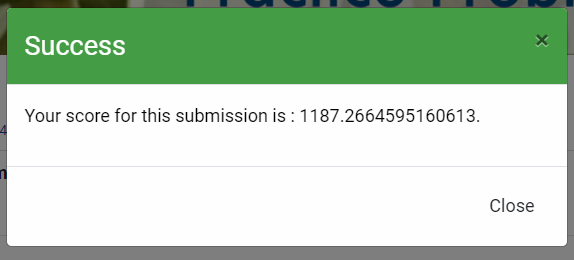


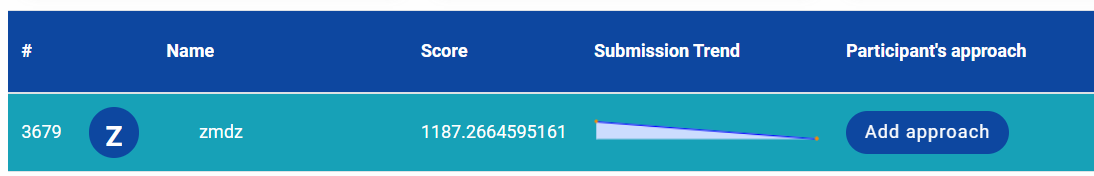

In [192]:
test.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [196]:
submisssion.head(2)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1834.444836
1,FDW14,OUT017,1348.401218


In [202]:
model_pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocess),
        ('feat_select',SelectKBest(f_regression,k=15)),
        ('lin_reg', LinearRegression())
    ])

In [203]:
model_pipeline.fit(train_X, train_y)

# validating with Train data(known data for the model)
pred_train_y = model_pipeline.predict(train_X)
print('Train RMSE using pipeline:',mean_squared_error(train_y,pred_train_y, squared=False))

# validating with Train data(unknown data for the model)
pred_val_y = model_pipeline.predict(val_X)
print('Validation RMSE using pipeline:',mean_squared_error(val_y,pred_val_y, squared=False))


Train RMSE using pipeline: 1142.5239745246051
Validation RMSE using pipeline: 1067.4183488263475


In [204]:
y_sub = model_pipeline.predict(test)
submisssion['Item_Outlet_Sales'] = y_sub
submisssion.loc[submisssion['Item_Outlet_Sales']<0,'Item_Outlet_Sales'] = 0
submisssion.to_csv('sub_using_pipeline1_kbest_wzero.csv',index=False)

###### Results
* After uploading the model using pipeline
* null imputation using mean/mode
* onehot encoding
* standardizing the scale

* adding FeatureSelection(KBest)

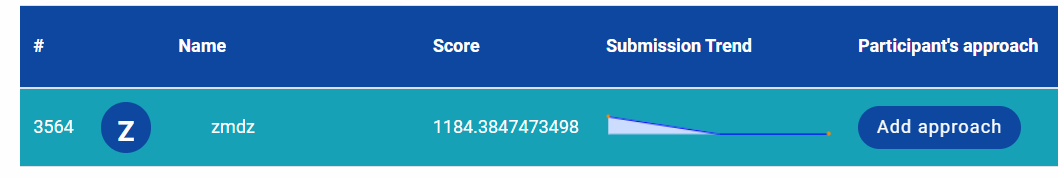